# Introduction

Our input is the selected model with best paramaters <br/>


# Notebooks & dashboard

There are 5 different notebooks:
* __P7_EDA__: focusing on Exploratory Data Analysis,
* __P7_FE__: focusing on Feature engineering and a first model-agnostic Feature Selection,
* __P7_FS__: focusing on Feature Selecion,
* __P7_Model__ : focusing on scoring with model evaluation,
* __Current: P7_Interpretation__ : focusing on model interpretation, <br/>
And a dashboard python file.

# Forewords
In this Notebook, we study both LIME & SHAP interpretability techniques, building materials for the dashboard.

In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import lime
from lime.lime_tabular import LimeTabularExplainer

In [4]:
import shap

In [5]:
from sklearn.pipeline import make_pipeline

In [6]:
filename = 'Data/model.sav'
model = pickle.load(open(filename, 'rb'))

In [7]:
model

LGBMClassifier(boosting_type='goss', class_weight='balanced',
               learning_rate=0.01897824986309232, max_depth=23,
               n_estimators=610, num_leaves=52)

In [16]:
pipe = make_pipeline(model)

In [17]:
# load target
with open("Data/final.pkl", mode="rb") as df:
    final = pickle.load(df)
print('New applications full shape: ', final.shape)

New applications full shape:  (48744, 128)


In [19]:
y_pred = pipe.predict(final.drop(columns=['RISK_FLAG', 'RISK_PROBA']))

In [20]:
y_pred

array([1., 1., 0., ..., 0., 0., 1.])

In [21]:
# check if failure is realistic applied on test set
pred_good = (y_pred == 0).sum()
pred_fail = (y_pred == 1).sum()
# control failure rate of y_pred
print('global failure rate: ',
     round(100 * pred_fail / (pred_good + pred_fail), 2))

global failure rate:  27.69


In [22]:
y_proba = pipe.predict_proba(final.drop(columns=['RISK_FLAG', 'RISK_PROBA']))

In [24]:
feature_importance_values = model.feature_importances_

In [28]:
feature_importances = pd.DataFrame({'feature': final.drop(columns=['RISK_FLAG', 'RISK_PROBA']).columns.to_list(), 'importance': feature_importance_values})

In [29]:
feature_importances

feature  importance
0                                     N_CREDIT_TERM        1331
1                                       YEARS_BIRTH         735
2                            DAYS_LAST_PHONE_CHANGE         613
3                                       AMT_ANNUITY         634
4                                        AMT_CREDIT         421
..                                              ...         ...
121                  BUR_AMT_CREDIT_MAX_OVERDUE_MAX         126
122           ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_SUM         130
123                          ACTIVE_DAYS_CREDIT_MIN         152
124                        PREV_AMT_APPLICATION_MAX         151
125  INSAGG_INS_N_PREV_EARLINESS_OVERDUE_RATIO_MEAN         163

[126 rows x 2 columns]

In [27]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [30]:
# labels for best threshold
y_pred = to_labels(y_proba, 0.5)[:, 1]

In [31]:
# check if failure is realistic applied on test set
pred_good = (y_pred == 0).sum()
pred_fail = (y_pred == 1).sum()
print('failure rate on entire test set: ', pred_fail / (pred_good + pred_fail))

failure rate on entire test set:  0.2769161332676842


In [32]:
failure_rate = pred_fail / (pred_good + pred_fail)

In [33]:
failure_rate

0.2769161332676842

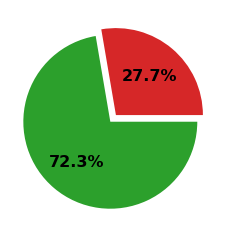

In [79]:
plt.pie(
    [failure_rate, 1 - failure_rate],
    colors=('tab:red', 'tab:green'),
    autopct='%1.1f%%',
    explode=(0, 0.1),
    textprops={'fontsize': 16,
               'weight': 'bold'}
)
plt.show()

In [31]:
inputs = final.drop(columns=['RISK_FLAG', 'RISK_PROBA'])

In [36]:
inputs.loc[[102068]]

N_CREDIT_TERM  YEARS_BIRTH  DAYS_LAST_PHONE_CHANGE  AMT_ANNUITY  \
SK_ID_CURR                                                                    
102068           0.067497    40.879452                 -2154.0      13198.5   

            AMT_CREDIT  DAYS_EMPLOYED  AMT_GOODS_PRICE  DAYS_ID_PUBLISH  \
SK_ID_CURR                                                                
102068        195543.0        -1754.0         148500.0          -4965.0   

            N_ANNUITY_INCOME_RATIO  BUR_DAYS_CREDIT_MEAN  ...  \
SK_ID_CURR                                                ...   
102068                    0.073325           -623.142857  ...   

            CLOSED_DAYS_CREDIT_ENDDATE_MIN  PREV_AMT_CREDIT_MIN  \
SK_ID_CURR                                                        
102068                             -1071.0              21159.0   

            PREV_N_ADJ_INTEREST_EVAL_MEAN  \
SK_ID_CURR                                  
102068                           0.029665   

            INSAGG_INS_N_PREV_LAST_DAYS_INSTALMENT_SUM  \
SK_ID_CURR                                               
102068                                        -29876.0   

            APPROVED_NC_LOAN_AGE_MEAN  BUR_AMT_CREDIT_MAX_OVERDUE_MAX  \
SK_ID_CURR                                                              
102068                           3.55                          6912.0   

            ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_SUM  ACTIVE_DAYS_CREDIT_MIN  \
SK_ID_CURR                                                                  
102068                                   1.559032                  -566.0   

            PREV_AMT_APPLICATION_MAX  \
SK_ID_CURR                             
102068                      900000.0   

            INSAGG_INS_N_PREV_EARLINESS_OVERDUE_RATIO_MEAN  
SK_ID_CURR                                                  
102068                                            0.381944  

[1 rows x 126 columns]

In [37]:
inputs.index.get_loc(102068)

299

In [38]:
inputs.iloc[[299]]

N_CREDIT_TERM  YEARS_BIRTH  DAYS_LAST_PHONE_CHANGE  AMT_ANNUITY  \
SK_ID_CURR                                                                    
102068           0.067497    40.879452                 -2154.0      13198.5   

            AMT_CREDIT  DAYS_EMPLOYED  AMT_GOODS_PRICE  DAYS_ID_PUBLISH  \
SK_ID_CURR                                                                
102068        195543.0        -1754.0         148500.0          -4965.0   

            N_ANNUITY_INCOME_RATIO  BUR_DAYS_CREDIT_MEAN  ...  \
SK_ID_CURR                                                ...   
102068                    0.073325           -623.142857  ...   

            CLOSED_DAYS_CREDIT_ENDDATE_MIN  PREV_AMT_CREDIT_MIN  \
SK_ID_CURR                                                        
102068                             -1071.0              21159.0   

            PREV_N_ADJ_INTEREST_EVAL_MEAN  \
SK_ID_CURR                                  
102068                           0.029665   

            INSAGG_INS_N_PREV_LAST_DAYS_INSTALMENT_SUM  \
SK_ID_CURR                                               
102068                                        -29876.0   

            APPROVED_NC_LOAN_AGE_MEAN  BUR_AMT_CREDIT_MAX_OVERDUE_MAX  \
SK_ID_CURR                                                              
102068                           3.55                          6912.0   

            ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_SUM  ACTIVE_DAYS_CREDIT_MIN  \
SK_ID_CURR                                                                  
102068                                   1.559032                  -566.0   

            PREV_AMT_APPLICATION_MAX  \
SK_ID_CURR                             
102068                      900000.0   

            INSAGG_INS_N_PREV_EARLINESS_OVERDUE_RATIO_MEAN  
SK_ID_CURR                                                  
102068                                            0.381944  

[1 rows x 126 columns]

In [39]:
idx = inputs.loc[[102068]].index.to_numpy()

In [36]:
inputs['CODE_GENDER'].dtypes

dtype('float64')

In [41]:
pipe.predict_proba(inputs.loc[[102068]])

array([[0.31154919, 0.68845081]])

In [42]:
pipe.predict(inputs.loc[[102068]])

array([1.])

In [92]:
threshold = 0.5

In [94]:
final[final['RISK_PROBA'] > threshold].sort_values('RISK_PROBA').head(3)

RISK_FLAG  RISK_PROBA  N_CREDIT_TERM  YEARS_BIRTH  \
SK_ID_CURR                                                      
231554              1    0.500001       0.032367    31.364384   
200241              1    0.500035       0.035918    61.095890   
438410              1    0.500038       0.119562    54.208219   

            DAYS_LAST_PHONE_CHANGE  AMT_ANNUITY  AMT_CREDIT  DAYS_EMPLOYED  \
SK_ID_CURR                                                                   
231554                     -2110.0      38349.0   1184809.5         -464.0   
200241                     -2559.0      18387.0    511920.0       -14638.0   
438410                      -595.0      17451.0    145957.5         -848.0   

            AMT_GOODS_PRICE  DAYS_ID_PUBLISH  ...  \
SK_ID_CURR                                    ...   
231554             913500.0           -654.0  ...   
200241             405000.0          -5033.0  ...   
438410             126000.0          -3340.0  ...   

            CLOSED_DAYS_CREDIT_ENDDATE_MIN  PREV_AMT_CREDIT_MIN  \
SK_ID_CURR                                                        
231554                        -1347.127457              29092.5   
200241                        -1383.000000              45000.0   
438410                        -1347.127457              90000.0   

            PREV_N_ADJ_INTEREST_EVAL_MEAN  \
SK_ID_CURR                                  
231554                          -0.019944   
200241                           0.000000   
438410                           0.105603   

            INSAGG_INS_N_PREV_LAST_DAYS_INSTALMENT_SUM  \
SK_ID_CURR                                               
231554                                        -27670.0   
200241                                        -57901.0   
438410                                          -147.0   

            APPROVED_NC_LOAN_AGE_MEAN  BUR_AMT_CREDIT_MAX_OVERDUE_MAX  \
SK_ID_CURR                                                              
231554                       3.916667                        0.000000   
200241                       7.750000                     3034.350000   
438410                       1.250000                     9012.323354   

            ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_SUM  ACTIVE_DAYS_CREDIT_MIN  \
SK_ID_CURR                                                                  
231554                                   0.000000             -158.000000   
200241                                   5.149222            -1779.000000   
438410                                 406.259677             -940.042198   

            PREV_AMT_APPLICATION_MAX  \
SK_ID_CURR                             
231554                     1125000.0   
200241                       67500.0   
438410                      328500.0   

            INSAGG_INS_N_PREV_EARLINESS_OVERDUE_RATIO_MEAN  
SK_ID_CURR                                                  
231554                                                 0.0  
200241                                                 0.0  
438410                                                 0.0  

[3 rows x 128 columns]

# LIME

In [35]:
help(LimeTabularExplainer)

Help on class LimeTabularExplainer in module lime.lime_tabular:

class LimeTabularExplainer(builtins.object)
 |  LimeTabularExplainer(training_data, mode='classification', training_labels=None, feature_names=None, categorical_features=None, categorical_names=None, kernel_width=None, kernel=None, verbose=False, class_names=None, feature_selection='auto', discretize_continuous=True, discretizer='quartile', sample_around_instance=False, random_state=None, training_data_stats=None)
 |  
 |  Explains predictions on tabular (i.e. matrix) data.
 |  For numerical features, perturb them by sampling from a Normal(0,1) and
 |  doing the inverse operation of mean-centering and scaling, according to the
 |  means and stds in the training data. For categorical features, perturb by
 |  sampling according to the training distribution, and making a binary
 |  feature that is 1 when the value is the same as the instance being
 |  explained.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, training

In [38]:
class_names = ['0: Low Risk','1: Failure Risk']
categorical_features = [17, 60, 71]

In [39]:
explainer = LimeTabularExplainer(
    training_data = inputs.values,
    mode='classification',
    training_labels = final['RISK_FLAG'],
    feature_names = inputs.columns,
    class_names=class_names,
    categorical_features=categorical_features)

In [40]:
explainer

In [41]:
type(final[['RISK_FLAG']])

pandas.core.frame.DataFrame

In [49]:
def explanation(i):
    exp = explainer.explain_instance(
        inputs.loc[i].values,
        pipe.predict_proba,
        num_features=10)
    exp.show_in_notebook(predict_proba=True, show_predicted_value=True, show_table=True, show_all=False)
    return exp

In [84]:
exp_test = explanation(102068)

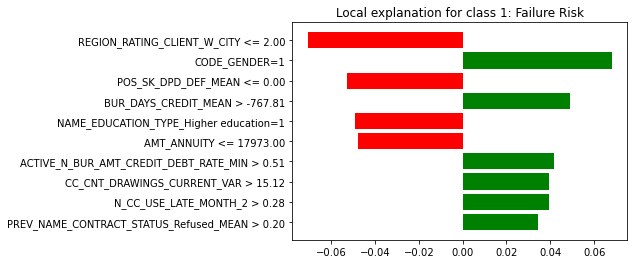

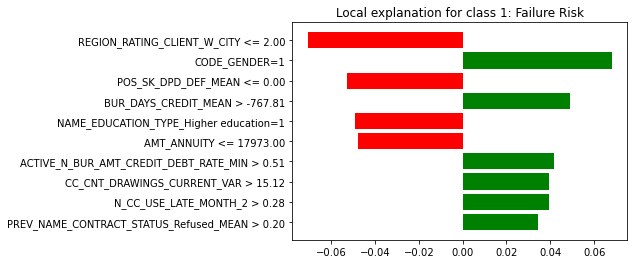

In [85]:
exp_test.as_pyplot_figure()

In [92]:
exp = exp_test.as_list()

Text(0.5, 1.0, 'Local explanation for Class 1: Failure Risk')

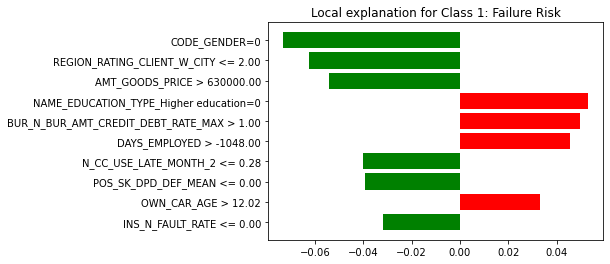

In [102]:
fig = plt.figure()
vals = [x[1] for x in exp]
names = [x[0] for x in exp]
vals.reverse()
names.reverse()
colors = ['red' if x > 0 else 'green' for x in vals]
pos = np.arange(len(exp)) + .5
plt.barh(pos, vals, align='center', color=colors)
plt.yticks(pos, names)
plt.title('Local explanation for Class 1: Failure Risk')

In [144]:
colors

['green',
 'red',
 'green',
 'green',
 'red',
 'red',
 'red',
 'green',
 'green',
 'green']

In [153]:
axisgb_colors = ['#fee0d2' if x > 0 else '#c7e9c0' for x in vals]

In [103]:
map_test = exp_test.as_map()

In [104]:
type(map_test)

dict

In [105]:
map_test[1]

[(17, -0.07304336687952905),
 (36, -0.0625323472200164),
 (6, -0.053974340241144864),
 (60, 0.052813942671615724),
 (45, 0.049576121244325644),
 (5, 0.04557190909382779),
 (35, -0.0400798225485634),
 (66, -0.039211669661062196),
 (11, 0.032967215513726535),
 (21, -0.03195325047811646)]

In [106]:
cols = [item[0] for item in map_test[1]]

In [107]:
cols

[17, 36, 6, 60, 45, 5, 35, 66, 11, 21]

In [108]:
features_to_show = inputs.columns[cols].tolist()

In [109]:
inputs.filter(features_to_show).loc[[412180]]

CODE_GENDER  REGION_RATING_CLIENT_W_CITY  AMT_GOODS_PRICE  \
SK_ID_CURR                                                              
412180              0.0                          2.0         733500.0   

            NAME_EDUCATION_TYPE_Higher education  \
SK_ID_CURR                                         
412180                                       0.0   

            BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MAX  DAYS_EMPLOYED  \
SK_ID_CURR                                                      
412180                              510.121308         -675.0   

            N_CC_USE_LATE_MONTH_2  POS_SK_DPD_DEF_MEAN  OWN_CAR_AGE  \
SK_ID_CURR                                                            
412180                   0.278956                  0.0         16.0   

            INS_N_FAULT_RATE  
SK_ID_CURR                    
412180                   0.0

In [110]:
inputs.index.get_loc(412180)

42799

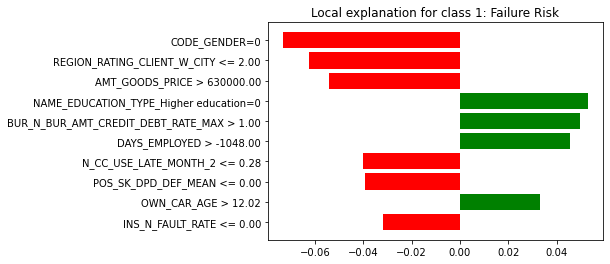

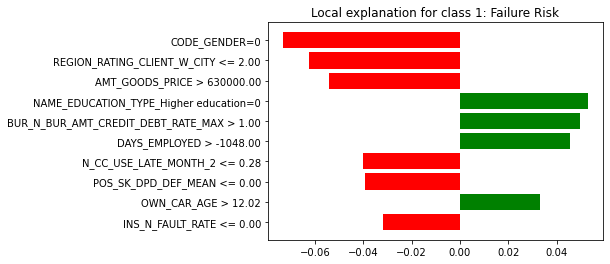

In [111]:
exp_test.as_pyplot_figure()

In [112]:
df_lime = inputs.filter(features_to_show)

In [113]:
df_lime.loc[[102068]]

CODE_GENDER  REGION_RATING_CLIENT_W_CITY  AMT_GOODS_PRICE  \
SK_ID_CURR                                                              
102068              1.0                          2.0         148500.0   

            NAME_EDUCATION_TYPE_Higher education  \
SK_ID_CURR                                         
102068                                       1.0   

            BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MAX  DAYS_EMPLOYED  \
SK_ID_CURR                                                      
102068                                 0.89958        -1754.0   

            N_CC_USE_LATE_MONTH_2  POS_SK_DPD_DEF_MEAN  OWN_CAR_AGE  \
SK_ID_CURR                                                            
102068                    1.03825                  0.0         13.0   

            INS_N_FAULT_RATE  
SK_ID_CURR                    
102068              0.041667

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
from sklearn.preprocessing import QuantileTransformer

In [138]:
df_lime_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df_lime.values), index=df_lime.index, columns=df_lime.columns)

In [139]:
df_lime_scaled.describe()

REGION_RATING_CLIENT_W_CITY   CODE_GENDER  BUR_DAYS_CREDIT_MEAN  \
count                 48744.000000  48744.000000          48744.000000   
mean                      0.753149      0.329600              0.627565   
std                       0.128951      0.470073              0.168104   
min                       0.000000      0.000000              0.000000   
25%                       0.750000      0.000000              0.535861   
50%                       0.750000      0.000000              0.628961   
75%                       0.750000      1.000000              0.737141   
max                       1.000000      1.000000              1.000000   

       NAME_EDUCATION_TYPE_Higher education  POS_SK_DPD_DEF_MEAN  \
count                          48744.000000         48744.000000   
mean                               0.256770             0.000198   
std                                0.436856             0.007471   
min                                0.000000             0.000000   
25%                                0.000000             0.000000   
50%                                0.000000             0.000000   
75%                                1.000000             0.000000   
max                                1.000000             1.000000   

        AMT_ANNUITY  N_CC_USE_LATE_MONTH_2  \
count  48744.000000           48744.000000   
mean       0.152177               0.125128   
std        0.089816               0.110498   
min        0.000000               0.000000   
25%        0.087940               0.127335   
50%        0.134207               0.127335   
75%        0.196855               0.127335   
max        1.000000               1.000000   

       ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MIN  CC_CNT_DRAWINGS_CURRENT_VAR  \
count                           48744.000000                 48744.000000   
mean                                0.000592                     0.005951   
std                                 0.004799                     0.014583   
min                                 0.000000                     0.000000   
25%                                 0.000000                     0.001449   
50%                                 0.000814                     0.006114   
75%                                 0.000817                     0.006114   
max                                 1.000000                     1.000000   

       PREV_NAME_CONTRACT_STATUS_Refused_MEAN  
count                            48744.000000  
mean                                 0.114530  
std                                  0.178161  
min                                  0.000000  
25%                                  0.000000  
50%                                  0.000000  
75%                                  0.200000  
max                                  1.000000

In [147]:
scale = MinMaxScaler().fit_transform(df_lime.values)

In [148]:
scale_quant = QuantileTransformer().fit_transform(scale)

In [149]:
df_lime_quant = pd.DataFrame(scale_quant, index=df_lime.index, columns=df_lime.columns)

In [156]:
df_lime_quant.loc[[102068]]

REGION_RATING_CLIENT_W_CITY  CODE_GENDER  BUR_DAYS_CREDIT_MEAN  \
SK_ID_CURR                                                                   
102068                         0.493493          1.0              0.826465   

            NAME_EDUCATION_TYPE_Higher education  POS_SK_DPD_DEF_MEAN  \
SK_ID_CURR                                                              
102068                                       1.0                  0.0   

            AMT_ANNUITY  N_CC_USE_LATE_MONTH_2  \
SK_ID_CURR                                       
102068         0.118605               0.985355   

            ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MIN  \
SK_ID_CURR                                          
102068                                   0.812306   

            CC_CNT_DRAWINGS_CURRENT_VAR  \
SK_ID_CURR                                
102068                         0.956794   

            PREV_NAME_CONTRACT_STATUS_Refused_MEAN  
SK_ID_CURR                                          
102068                                    0.916917

In [ ]:
# y include riskl_flag with value 0 or 1
y = final['RISK_FLAG']
data = pd.concat([y, df_lime_quant], axis=1)
data = pd.melt(data, id_vars='RISK_FLAG',
 var_name='features',
 value_name='value')
# make a violin plot
plt.figure(figsize=(10,10))
sns.violinplot(x='value', y='features', hue='RISK_FLAG', palette=['tab:green', 'tab:red'], data=data, split=True, scale='width')
plt.xticks(rotation=90)

In [122]:
df_lime_std

REGION_RATING_CLIENT_W_CITY  CODE_GENDER  BUR_DAYS_CREDIT_MEAN  \
SK_ID_CURR                                                                   
100001                        -0.024421    -0.701167              0.718656   
100005                        -0.024421     1.426164              1.827204   
100013                        -0.024421     1.426164             -1.322960   
100028                        -0.024421    -0.701167             -0.639197   
100038                        -0.024421     1.426164              0.008307   
...                                 ...          ...                   ...   
456221                         1.914299    -0.701167              0.734541   
456222                        -0.024421    -0.701167              0.008307   
456223                        -0.024421    -0.701167              1.117815   
456224                        -0.024421     1.426164             -1.360276   
456250                        -0.024421    -0.701167              0.460017   

            NAME_EDUCATION_TYPE_Higher education  POS_SK_DPD_DEF_MEAN  \
SK_ID_CURR                                                              
100001                                  1.701316             0.258554   
100005                                 -0.587768            -0.026540   
100013                                  1.701316            -0.026540   
100028                                 -0.587768            -0.026540   
100038                                 -0.587768            -0.026540   
...                                          ...                  ...   
456221                                 -0.587768            -0.026540   
456222                                 -0.587768            -0.026540   
456223                                 -0.587768            -0.026540   
456224                                  1.701316            -0.026540   
456250                                 -0.587768            -0.026540   

            AMT_ANNUITY  N_CC_USE_LATE_MONTH_2  \
SK_ID_CURR                                       
100001        -0.553615               0.019972   
100005        -0.752866               0.019972   
100013         2.520017              -1.132397   
100028         1.223623              -0.446909   
100038         0.164980               0.019972   
...                 ...                    ...   
456221        -0.746402               0.019972   
456222         0.155144               0.019972   
456223         0.236081               0.019972   
456224        -0.268369               0.019972   
456250        -0.294505               2.592963   

            ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MIN  \
SK_ID_CURR                                          
100001                                   0.046717   
100005                                   0.047304   
100013                                  -0.123341   
100028                                   0.046335   
100038                                  -0.123341   
...                                           ...   
456221                                   0.046984   
456222                                  -0.123341   
456223                                   0.046817   
456224                                   0.046335   
456250                                   0.047311   

            CC_CNT_DRAWINGS_CURRENT_VAR  \
SK_ID_CURR                                
100001                         0.011204   
100005                         0.011204   
100013                        -0.371426   
100028                        -0.184179   
100038                         0.011204   
...                                 ...   
456221                         0.011204   
456222                         0.011204   
456223                         0.011204   
456224                         0.011204   
456250                        -0.295480   

            PREV_NAME_CONTRACT_STATUS_Refused_MEAN  
SK_ID_CURR                                          
100001                                  

In [56]:
exp_test.available_labels()

[1]

In [58]:
explanation(100001)

In [116]:
from sklearn.neighbors import NearestNeighbors

In [117]:
nearest_neighbors = NearestNeighbors(n_neighbors=20, radius=0.4)

In [118]:
nearest_neighbors.fit(df_lime)

NearestNeighbors(n_neighbors=20, radius=0.4)

In [119]:
neighbors = nearest_neighbors.kneighbors(df_lime.loc[[102068]], 21, return_distance=False)[0]

In [120]:
neighbors

array([  299, 48422, 44192, 32519, 29116, 34456, 22729, 27416, 14665,
       37654, 38401, 15400, 22370, 48074,  3809, 44176, 43363,  9622,
       25767, 21588, 40940], dtype=int64)

In [121]:
neighbors = np.delete(neighbors, 0)

In [122]:
df_neighbors = df_lime.iloc[neighbors]

In [123]:
df_neighbors.shape

(20, 10)

In [124]:
neighbors_values = pd.DataFrame(df_neighbors.mean(), index=df_neighbors.columns, columns=['neighbors_mean'])

In [125]:
neighbors_values = pd.DataFrame(
                df_lime.iloc[neighbors].mean(),
                index=df_lime.columns,
                columns=['Neighbors_Mean'])

In [126]:
neighbors_values

Neighbors_Mean
CODE_GENDER                                 0.200000
REGION_RATING_CLIENT_W_CITY                 2.200000
AMT_GOODS_PRICE                        148500.000000
NAME_EDUCATION_TYPE_Higher education        0.200000
BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MAX          0.574602
DAYS_EMPLOYED                           -1764.150000
N_CC_USE_LATE_MONTH_2                       0.223749
POS_SK_DPD_DEF_MEAN                         0.026045
OWN_CAR_AGE                                11.365448
INS_N_FAULT_RATE                            0.062689

In [127]:
df_individual = df_lime.loc[[102068]]

In [128]:
individual_values = df_individual.T 

In [129]:
individual_values

SK_ID_CURR                                   102068
CODE_GENDER                                1.000000
REGION_RATING_CLIENT_W_CITY                2.000000
AMT_GOODS_PRICE                       148500.000000
NAME_EDUCATION_TYPE_Higher education       1.000000
BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MAX         0.899580
DAYS_EMPLOYED                          -1754.000000
N_CC_USE_LATE_MONTH_2                      1.038250
POS_SK_DPD_DEF_MEAN                        0.000000
OWN_CAR_AGE                               13.000000
INS_N_FAULT_RATE                           0.041667

In [130]:
individual_values.columns = ['client']

In [131]:
individual_values

client
CODE_GENDER                                1.000000
REGION_RATING_CLIENT_W_CITY                2.000000
AMT_GOODS_PRICE                       148500.000000
NAME_EDUCATION_TYPE_Higher education       1.000000
BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MAX         0.899580
DAYS_EMPLOYED                          -1754.000000
N_CC_USE_LATE_MONTH_2                      1.038250
POS_SK_DPD_DEF_MEAN                        0.000000
OWN_CAR_AGE                               13.000000
INS_N_FAULT_RATE                           0.041667

In [132]:
df_lime['RISK_FLAG'] = final['RISK_FLAG']

In [133]:
class1_values = pd.DataFrame(
    df_lime[df_lime['RISK_FLAG'] == 1].mean(), index=df_lime.columns, columns=['class1_mean'])

In [134]:
class1_values.iloc[:-1]

class1_mean
CODE_GENDER                                0.473774
REGION_RATING_CLIENT_W_CITY                2.150393
AMT_GOODS_PRICE                       409393.009816
NAME_EDUCATION_TYPE_Higher education       0.140021
BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MAX       569.725775
DAYS_EMPLOYED                          -1759.267081
N_CC_USE_LATE_MONTH_2                      0.357474
POS_SK_DPD_DEF_MEAN                        0.188222
OWN_CAR_AGE                               12.618919
INS_N_FAULT_RATE                           0.071807

In [135]:
class0_values = pd.DataFrame(
    df_lime[df_lime['RISK_FLAG'] == 0].mean(), index=df_lime.columns, columns=['class0_mean'])

In [136]:
class0_values.iloc[:-1] 

class0_mean
CODE_GENDER                                0.274386
REGION_RATING_CLIENT_W_CITY                1.959825
AMT_GOODS_PRICE                       483002.494283
NAME_EDUCATION_TYPE_Higher education       0.301481
BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MAX       217.353243
DAYS_EMPLOYED                          -2730.439466
N_CC_USE_LATE_MONTH_2                      0.242201
POS_SK_DPD_DEF_MEAN                        0.056661
OWN_CAR_AGE                               11.685007
INS_N_FAULT_RATE                           0.040277

In [137]:
any_values = pd.concat([class0_values.iloc[:-1], class1_values.iloc[:-1], neighbors_values, individual_values], axis=1)

In [138]:
any_values.index[2]

'AMT_GOODS_PRICE'

In [139]:
to_plot = any_values.T

In [140]:
any_values.T.iloc[:, 2]

class0_mean       483002.494283
class1_mean       409393.009816
Neighbors_Mean    148500.000000
client            148500.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [156]:
colorsList = ('tab:green', 'tab:red', 'tab:cyan', 'tab:blue') 

In [142]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

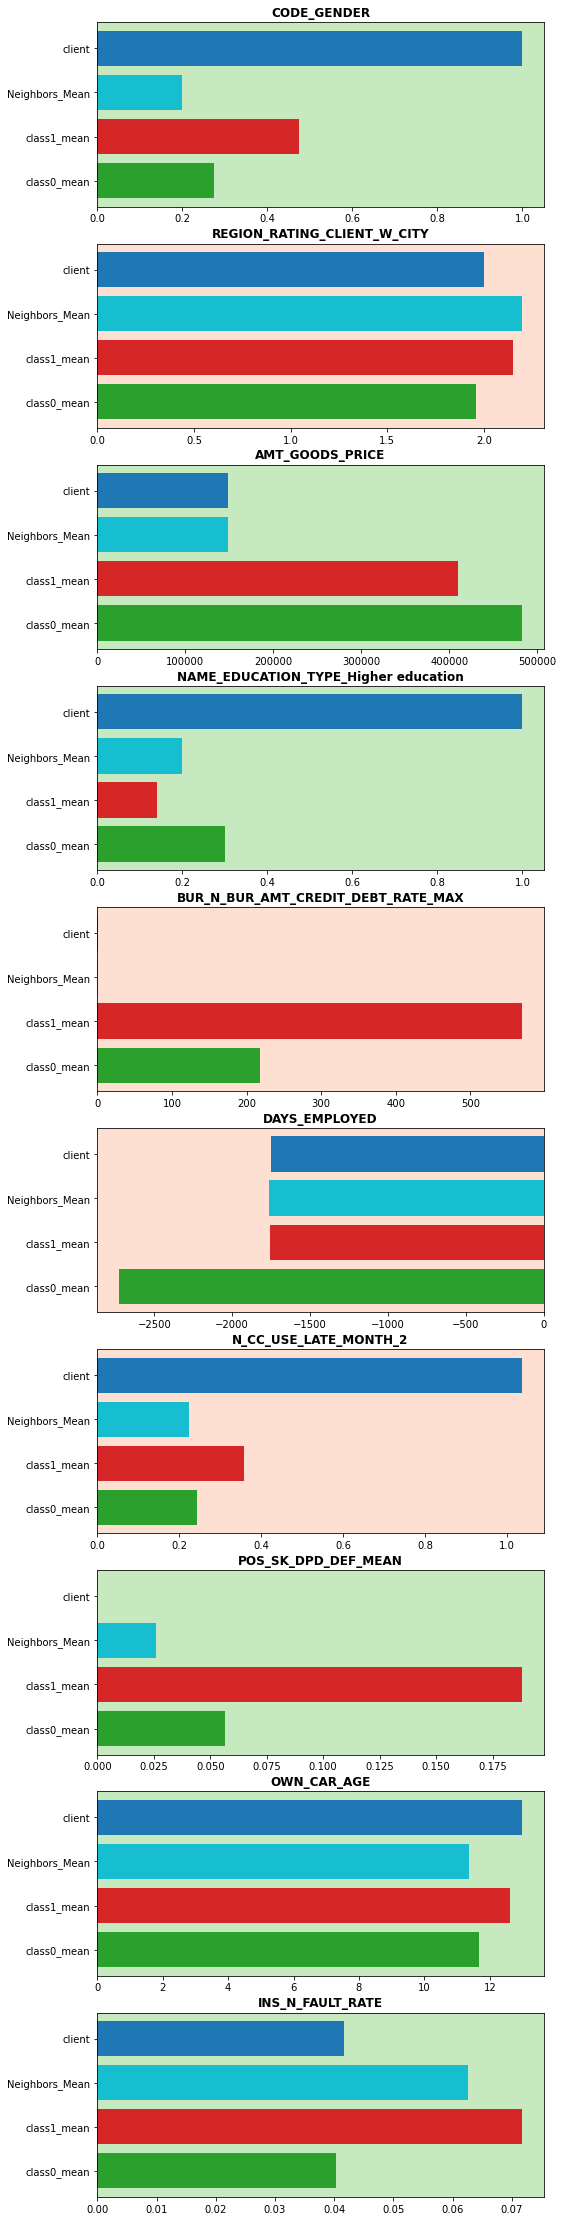

In [157]:
fig, axs = plt.subplots(10, sharey='row', figsize=(8, 40))
axgb_colors = []
for i in np.arange(0, 10):
    axs[i].barh(any_values.T.index,
                any_values.T.iloc[:, i],
                color=colorsList)
    axs[i].set_title(str(any_values.index[i]), fontweight="bold")
    axs[i].patch.set_facecolor(axisgb_colors[i])
plt.show()

# SHAP

In [69]:
explainerModel = shap.TreeExplainer(model)

In [70]:
explainerModel

In [71]:
# save the shap explainer
filename = 'Data/shap.exp'
pickle.dump(explainerModel, open(filename, 'wb'))

In [72]:
shap_values_Model = explainerModel.shap_values(inputs.values)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [73]:
# save the shap values
filename = 'Data/shap.val'
pickle.dump(shap_values_Model, open(filename, 'wb'))

In [74]:
shap.initjs()

In [90]:
j = 42799
print('credit_index =', j)
fig = shap.force_plot(explainerModel.expected_value[1], shap_values_Model[1][j], inputs.iloc[[j]])

credit_index = 42799


In [91]:
fig

In [77]:
shap_values = shap_values_Model

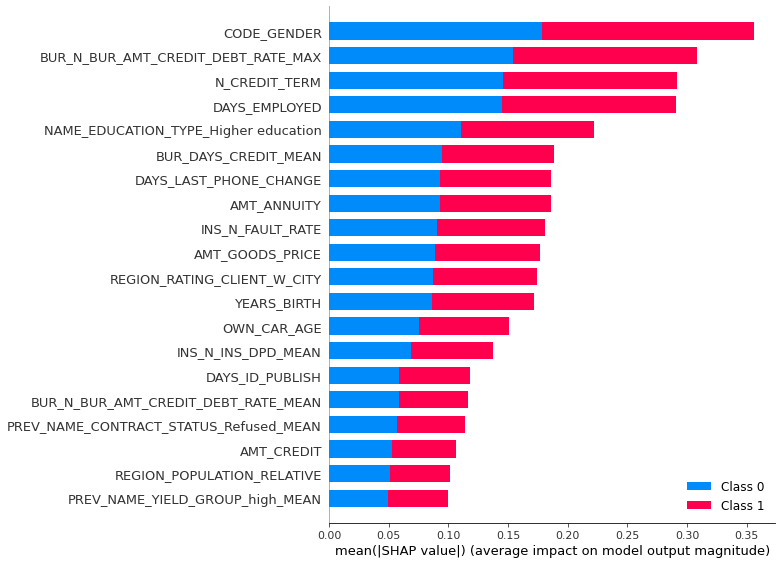

In [78]:
shap.summary_plot(shap_values, inputs, plot_type='bar')

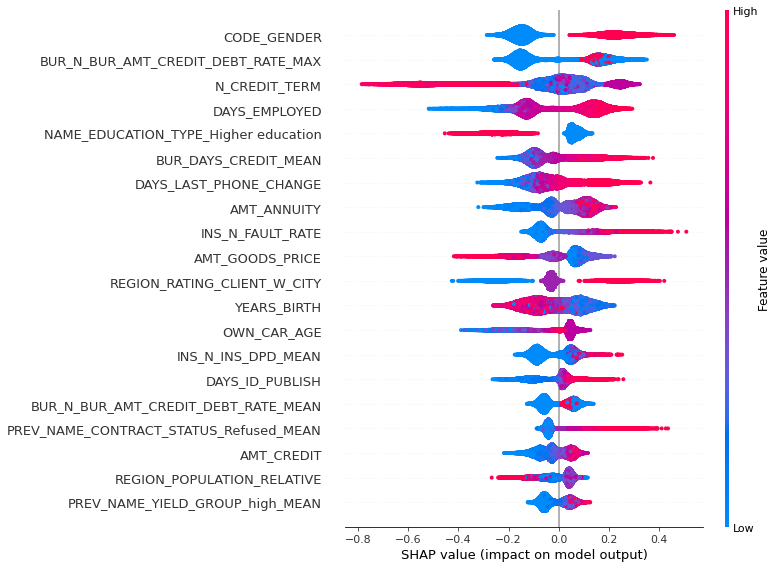

In [161]:
shap.summary_plot(shap_values[1], inputs, show=False)

In [163]:
fig_force = shap.force_plot(explainerModel.expected_value[1], shap_values[1][:1000,:], inputs.iloc[:1000,:])

In [165]:
type(fig_force)

shap.plots._force.AdditiveForceArrayVisualizer